In [2]:
import tensorflow as tf

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.constant(x_data, dtype=tf.float32)
Y = tf.constant(y_data, dtype=tf.float32)

W = tf.Variable(tf.random.normal([3, 3]))
b = tf.Variable(tf.random.normal([3]))

#hypothesis function
def model(X, W, b):
    return tf.nn.softmax(tf.matmul(X, W) + b)

#cross enthropy
def loss(Y, hypothesis):
    return tf.reduce_mean(tf.reduce_sum(Y * tf.math.log(hypothesis), axis=1))

def train(X, Y, W, b, learning_rate=1e-10):
    with tf.GradientTape() as tape:
        hypothesis = model(X, W, b)
        cost = loss(Y, hypothesis)
        
    gradients = tape.gradient(cost, [W, b])
    
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

def predict(X, W, b):
    return tf.argmax(model(X, W, b), 1)

def accuracy(X, Y, W, b):
    prediction = predict(X, W, b)
    is_correct = tf.equal(prediction, tf.argmax(Y, 1))
    return tf.reduce_mean(tf.cast(is_correct, tf.float32))

for step in range(201):
    train(X, Y, W, b)
    cost_val = loss(Y, model(X, W, b))
    print(step, cost_val.numpy(), W.numpy())

x_test_var = tf.constant(x_test, dtype=tf.float32)
print("Prediction:", predict(x_test_var, W, b).numpy())
print("Accuracy: ", accuracy(x_test_var, tf.constant(y_test, dtype=tf.float32), W, b).numpy())


0 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
1 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
2 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
3 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
4 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
5 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
6 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68362045]
 [-0.4138558  -0.9952862  -0.87643915]]
7 -2.8777475 [[ 0.6180538  -0.64044863 -0.30305913]
 [ 0.8063584   0.09972315  0.68

In [4]:
import tensorflow as tf
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

W = tf.Variable(tf.random.normal([4, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

def model(X):
    return tf.matmul(X, W) + b

def loss(Y, hypothesis):
    return tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.optimizers.SGD(learning_rate=1e-5)

def train(X, Y):
    with tf.GradientTape() as tape:
        hypothesis = model(X)
        cost = loss(Y, hypothesis)
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

# Min-Max Normalization
def min_max_normalize(dataset):
    min_value = np.min(dataset, axis=0)
    max_value = np.max(dataset, axis=0)
    
    return (dataset - min_value) / (max_value - min_value)

x_data_normalized = min_max_normalize(x_data)
y_data_normalized = min_max_normalize(y_data)

X = tf.constant(x_data_normalized, dtype=tf.float32)
Y = tf.constant(y_data_normalized, dtype=tf.float32)

for step in range(101):
    train(X, Y)
    cost_val = loss(Y, model(X))
    hy_val = model(X)
    print(step, "Cost: ", cost_val.numpy(), "\nPrediction:\n", hy_val.numpy())


0 Cost:  0.59047544 
Prediction:
 [[ 0.5222579 ]
 [-0.6946373 ]
 [-0.33594805]
 [ 0.09718047]
 [-0.09469368]
 [-0.12896378]
 [-0.1977076 ]
 [-0.4831944 ]]
1 Cost:  0.5904372 
Prediction:
 [[ 0.5222927 ]
 [-0.6946016 ]
 [-0.33591878]
 [ 0.09720264]
 [-0.09466718]
 [-0.12893817]
 [-0.19769026]
 [-0.48317677]]
2 Cost:  0.590399 
Prediction:
 [[ 0.5223275 ]
 [-0.6945661 ]
 [-0.33588955]
 [ 0.09722479]
 [-0.09464069]
 [-0.12891248]
 [-0.19767295]
 [-0.4831591 ]]
3 Cost:  0.59036076 
Prediction:
 [[ 0.5223623 ]
 [-0.69453037]
 [-0.33586028]
 [ 0.09724694]
 [-0.09461423]
 [-0.12888688]
 [-0.19765565]
 [-0.48314148]]
4 Cost:  0.5903225 
Prediction:
 [[ 0.52239704]
 [-0.69449466]
 [-0.335831  ]
 [ 0.09726908]
 [-0.09458777]
 [-0.12886122]
 [-0.1976383 ]
 [-0.48312378]]
5 Cost:  0.59028435 
Prediction:
 [[ 0.52243185]
 [-0.69445914]
 [-0.33580172]
 [ 0.09729122]
 [-0.0945613 ]
 [-0.1288356 ]
 [-0.19762099]
 [-0.4831061 ]]
6 Cost:  0.5902462 
Prediction:
 [[ 0.52246666]
 [-0.69442356]
 [-0.335772

Epoch: 0001, Cost: 1.253804140
Epoch: 0002, Cost: 0.566553944
Epoch: 0003, Cost: 0.478168053
Epoch: 0004, Cost: 0.434260539
Epoch: 0005, Cost: 0.406304750
Epoch: 0006, Cost: 0.386369006
Epoch: 0007, Cost: 0.371190658
Epoch: 0008, Cost: 0.359123811
Epoch: 0009, Cost: 0.349229012
Epoch: 0010, Cost: 0.340923515
Epoch: 0011, Cost: 0.333823285
Epoch: 0012, Cost: 0.327663182
Epoch: 0013, Cost: 0.322253250
Epoch: 0014, Cost: 0.317453251
Epoch: 0015, Cost: 0.313157052
Learning finished
Accuracy:  0.9059
Label:  [1]
Prediction:  [1]


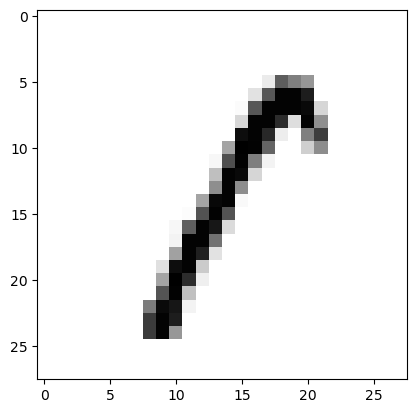

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

mnist = tf.keras.datasets.mnist

# 데이터셋을 로드하고 훈련 및 테스트 세트로 분할
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 원-핫 인코딩
y_train = tf.one_hot(y_train, depth=10, dtype=tf.float64)
y_test = tf.one_hot(y_test, depth=10, dtype=tf.float64)

# MNIST 이미지는 28x28 크기이므로 784 길이의 벡터로 변환
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

W = tf.Variable(tf.random.uniform([784, 10], minval=-1., maxval=1., dtype=tf.float64))
b = tf.Variable(tf.zeros([10], dtype=tf.float64))

# 가설 설정 (소프트맥스 사용)
@tf.function
def model(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

# 비용함수 (크로스 엔트로피 사용)
def cost(X, Y):
    return -tf.reduce_mean(tf.reduce_sum(Y * tf.math.log(model(X)), axis=1))

def train(X, Y):
    with tf.GradientTape() as tape:
        c = cost(X, Y)
        
    gradients = tape.gradient(c, [W, b])
    optimizer = tf.optimizers.SGD(learning_rate=0.1)
    optimizer.apply_gradients(zip(gradients, [W, b]))

# 모델 테스트
def is_correct(X, Y):
    return tf.equal(tf.argmax(model(X), 1), tf.argmax(Y, 1))

# 정확도 계산
def accuracy(X, Y):
    return tf.reduce_mean(tf.cast(is_correct(X, Y), tf.float32))

# 매개변수
num_epochs = 15
batch_size = 100
total_batch = x_train.shape[0] // batch_size

# 훈련 사이클
for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = x_train[i * batch_size:(i+1) * batch_size], y_train[i * batch_size:(i+1) * batch_size]
        train(batch_xs, batch_ys)
        avg_cost += cost(batch_xs, batch_ys) / total_batch

    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

print("Learning finished")

# 테스트 셋을 사용하여 모델 테스트 및 정확도 계산
print("Accuracy: ", accuracy(x_test, y_test).numpy())

# 하나의 예측값 가져오기
r = random.randint(0, x_test.shape[0] - 1)
print("Label: ", tf.argmax(y_test[r : r + 1], 1).numpy())
print("Prediction: ", tf.argmax(model(x_test[r : r + 1]), 1).numpy())

# 예측한 이미지 출력
plt.imshow(x_test[r : r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()